In [1]:
%matplotlib inline

In [2]:
import itertools 
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.text as mtext
import matplotlib.path as mpath

import numpy as np
import pandas as pd

# (scale, length, randomness).)
#plt.xkcd()
#import highlight_text as ht

import intro_plots as ip
from papercolors import colordict as pcd

paper_path = Path('../figures/')
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\story\\miniconda3\\envs\\paper\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [3]:
# tau 
df = pd.read_parquet("nydata_2022.parquet")

In [4]:
df['NAME']

0                 BINGHAMTON
1               LAGUARDIA AP
2         ROCHESTER GTR INTL
3         ROCHESTER GTR INTL
4      ISLIP-LI MACARTHUR AP
               ...          
269    ISLIP-LI MACARTHUR AP
270    ISLIP-LI MACARTHUR AP
271           GLENS FALLS AP
272             LAGUARDIA AP
273               BINGHAMTON
Name: NAME, Length: 3253, dtype: string

In [5]:
df['AC'] = df['NAME'].replace(ip.airport_codes)

AttributeError: module 'intro_plots' has no attribute 'airport_codes'

In [ ]:
color=pcd['fiber']
rows = ["NAME", "TEMP (°F)", "PRCP (in.)"]

fiber_node = (r"<$F_{node}=$>"+ f"<{rows[0]}>:" + r"<$\{st_0,\;\dots,\;st_n\}\; \times$>" + 
              f"<{rows[1]}>:" + r"<$\mathbb{R}\;\times$>" +
              f"<{rows[2]}>:" + r"<$\mathbb{R}^{+}$>")


fnprops = [{"color":pcd['fiber'], 'fontsize':12}, {"color":"gray","fontsize":10}, 
           {"color":pcd['fiber'], 'fontsize':12}, 
           {"color":"gray","fontsize":10}, {"color":pcd['fiber'], 'fontsize':12}, 
           {"color":"gray","fontsize":10}, {"color":pcd['fiber'], 'fontsize':12}]

fiber_edge = r"<$F_{edge}$>" + "<DISTANCE>:" +r"<$\mathbb{R}^{+}$>"
feprops = [{"color":pcd['fiber'], 'fontsize':12}, {"color":"gray","fontsize":10}, 
           {"color":pcd['fiber'], 'fontsize':12}
          
          
          
          
          ]
section = r"<$\tau($>" + "<{k}>" + r"<$)$>"
section_line = r"<$\tau($>" + "<({ks}, {kt}), {k}>" + r"<$)$>"
fiber_line = r"$\mathbb{R}^{+}$"

#x = np.linspace(-5,5,10000)
#y = lambda x: (1/np.sqrt(2*np.pi))*np.e**(-x**2/2)



In [ ]:
row = df[['AC','NAME', 'TEMP (°F)', 'PRCP (in.)', "NEW YORK JFK INTL AP"]].loc[0]
section_node = (section + 
'''< = {{><{k}><, ><({v1},> <{v2}°,> <{v3})><}}>''') 
sprops = [{"color":pcd['section']}, {'color':pcd['base']}, {'color':pcd['section']}, 
          {'color':pcd['section']}, {'color':pcd['base']},  {'color':pcd['section']},
         {'color':ip.cdict[row['NAME']]}, {'color':ip.cdict[row['NAME']]}, {'color':ip.cdict[row['NAME']]},  
          {'color':pcd['section']}]
#print(section_node.format(k=0, v1=row['NAME'], v2=row['TEMP (°F)'], v3=row['PRCP (in.)']))
section_edge = (section_line + """<= {{><(({ks},{kt}),{k})><,({v:.2f})}}>""")
seprops = [{"color":pcd['section']}, {'color':pcd['base']}, {'color':pcd['section']}, 
           {'color':pcd['section']}, {'color':pcd['base']},  {'color':pcd['section']}]

In [ ]:
def make_node(fig, ax):
    yloc = 1.25
    ypts = .2
    xpts = [.1, 2.9]
        
    ht.ax_text(.05, yloc, s=fiber_node, highlight_textprops=fnprops, ha='left', va='bottom', 
               ax=ax, transform=ax.transAxes)

    # node section
    ynmid = ypts+(yloc-ypts)/2
    pin = mpatches.FancyArrowPatch((xpts[0], yloc), (xpts[0], ypts), 
                                      arrowstyle='->', mutation_scale=20, color='gray')
    ax.add_artist(pin)
    ax.text(xpts[0], ynmid, r"$\pi$", color="gray", ha='right', va='center')
    
    ht.ax_text(xpts[0]+.1, ynmid+.1, section_node.format(k=0, v1=row['AC'], v2=row['TEMP (°F)'], v3=row['PRCP (in.)']), 
               highlight_textprops=sprops, fontsize=10)
    tau1 = mpatches.FancyArrowPatch((xpts[0], ypts), (xpts[0], yloc), color=pcd['section'],
                                     connectionstyle='arc3,rad=.2',  arrowstyle='->', mutation_scale=20)
    ax.add_artist(tau1)
    
    #edge section
    xloc = 2.3
    yloff = .3
    ht.ax_text(xloc, yloc-yloff, s=fiber_edge, highlight_textprops=feprops, ha='center', va='bottom' )
    
    xe = xloc-.4
    
    yemid = ypts + (yloc-yloff - ypts)/2
    pie = mpatches.FancyArrowPatch((xe, yloc-yloff), (xe, ypts), arrowstyle='->', 
                                   mutation_scale=20, color='gray')
    ax.add_artist(pie)
    ax.text(xe-.01, yemid, r"$\pi$", color="gray", ha='right', va='center')
    
    ht.ax_text(xe+.075, yemid, s=section_edge.format(ks=0, kt=2, k=.8, v= row["NEW YORK JFK INTL AP"]), 
                                                     highlight_textprops=seprops)
    tau2 = mpatches.FancyArrowPatch((xe, ypts), (xe, yloc-yloff), color=pcd['section'],
                                     connectionstyle='arc3,rad=.2',  arrowstyle='->', mutation_scale=20)
    ax.add_artist(tau2)
  
    ax.plot(xpts,[ypts, ypts],  color=pcd['base'], marker='o')
    for i, x in enumerate([xpts[0], xpts[0]+(xpts[1]-xpts[0])/2, xpts[1]]):
        ax.text(x, ypts-.03, f"$K_{i}$",color=pcd['base'], va='top', ha='center')
    
    ax.set(xlim=(0, 3), ylim=(0, 1.5), aspect='equal', yticks=[], xticks=[])
    ax.axis('off')

In [7]:
row = df[['NAME', 'TAVG', 'PRCP']][(df['NAME']=="JFK INTL AP")].loc[237].iloc[-1]

In [8]:
row ##axrho.set(ylim=(.655, .6675), xlim=(33.75, 34.25))

NAME    JFK INTL AP
TAVG          66.02
PRCP       0.311023
Name: 237, dtype: object

C:\Users\story\AppData\Local\Temp\ipykernel_13052\2410516556.py:97: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.savefig("../figures/fb_rho.pdf", dpi=300, bbox_inches='tight')
C:\Users\story\miniconda3\envs\paper\Lib\site-packages\IPython\core\events.py:82: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  func(*args, **kwargs)
C:\Users\story\miniconda3\envs\paper\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


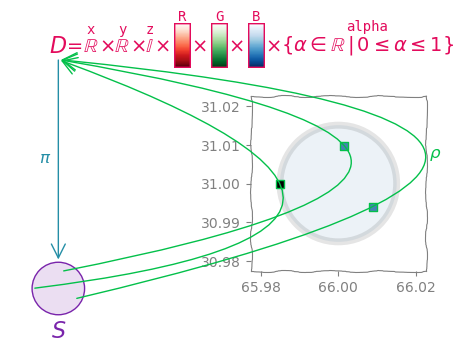

In [57]:
fig, ax = plt.subplots(figsize=(3.5,3.5), layout='compressed')

ft = 14
x0 = .15
D = fig.text(.15,.925, r"$D$",  fontsize=ft+2, color=pcd['fiber'], ha='center', va='baseline')

dkwargs = dict(fontsize=ft, color=pcd['fiber'], ha='left', va='center')
lkwargs = dict(fontsize=ft-4, fontfamily = 'monospace', color=pcd['fiber'], ha='center', va='bottom')

tf = ax.annotate("=", xy=(1,.5), xycoords=D, **dkwargs)
x = ax.annotate(r"$\mathbb{R}$", xycoords= tf, xy = (1,.5), **dkwargs)
xl = ax.annotate("x", xycoords=x, xy=(.5,1), **lkwargs)
times = ax.annotate(r"$\times$", xycoords=x, xy = (1,.5), **dkwargs)
y = ax.annotate(r"$\mathbb{R}$", xycoords=times, xy=(1,.5), **dkwargs)
yl = ax.annotate("y", xycoords=y, xy=(.5,1), **lkwargs)
times = ax.annotate(r"$\times$", xycoords=y, xy = (1,.5), **dkwargs)
z = ax.annotate(r"$\mathbb{I}$", xycoords=times, xy = (1,.5), **dkwargs)
zl = ax.annotate("z", xycoords=z, xy=(.5,1), **lkwargs)
        
   
N = 30
M = 10
arr = np.repeat(np.linspace(0,1, N), M).reshape(N,M)
pad = 1
cfiber = np.ones((N+pad*2, M+pad*2))*2
cfiber[pad:-pad, pad:-pad] = arr
norm = mcolors.Normalize(vmin=0, vmax=1)

#(left, right, bottom, top)
va = 'bottom'
ha = 'left'
xy = (1,0)
xycoords = z


for cname in ["Reds", "Greens", "Blues"]:
    times = ax.annotate(r"$\times$", xycoords=xycoords, xy = xy, fontsize=ft, color=pcd['fiber'], va=va, ha=ha)
    cmap = mpl.colormaps[cname].resampled(N).with_extremes(over=pcd['fiber'])
    im = OffsetImage(cfiber, cmap=cmap, norm=norm)
    im.image.axes = ax
    
    ab = AnnotationBbox(im, xy = (1.8, .5), xycoords=times, frameon=False)
    ax.add_artist(ab)
    ax.annotate(cname[0], xycoords=ab, xy=(.5,.9), **lkwargs)
    ha = 'center'
    xy = (1.5, 0)
    xycoords = (im, tf)
    
times = ax.annotate(r"$ \times$", 
            xy=xy, xycoords=xycoords, fontsize=ft, color=pcd['fiber'], ha=ha, va=va)

alpha = ax.annotate(r"$\{\alpha \in \mathbb{R} \,\vert \, 0\leq \alpha \leq 1\}$", 
            xy=(1,.55), xycoords=times, fontsize=ft, color=pcd['fiber'], ha='left', va='center')
al = ax.annotate("alpha", xycoords=alpha, xy=(.5,1), **lkwargs)

K = mpatches.Circle((x0, .25), .075, edgecolor=pcd['base'], facecolor=mcolors.to_rgba(pcd['base'], alpha=.15))
fig.add_artist(K)
#ax.add_patch(K)

pi_arr = ax.annotate("", xy=(.5, 1), xycoords=K, xytext=(.5, 0), textcoords=D, arrowprops=dict(arrowstyle='->', color=pcd['total'], mutation_scale=25))
pi_lab = ax.annotate(r"$\pi$", xy=(0,.5), xycoords=pi_arr, fontsize=ft-2, color=pcd['total'], va='center', ha='right')

ax.annotate(r"$S$", xy=(.5, -.1), xycoords=K, color=pcd['base'], fontsize=ft+2, va='top', ha='center')

ax.tick_params('both', length=0)
#ax.set(xticklabels=[], yticklabels=[]) 
ax.axis('off')

x, y = (row['TAVG'],row['PRCP'])
axrho = fig.add_axes([.7, .3, .5, .5], zorder=2)


axrho.spines[:].set_sketch_params(1, 100, 10)
axrho.spines[:].set_color('gray')
axrho.tick_params(colors='gray')
cinner = 'steelblue'
#sc = axrho.scatter(x,y, color= cinner, s=6000, edgecolor='k', lw=2, alpha=.05)
x, y = (66, 31) 
r = .015
sc = mpatches.Circle((x,y), radius=r, facecolor=cinner, edgecolor='k', lw=5, alpha=.1)
axrho.add_patch(sc)
axrho.set_aspect('equal')
axrho.set(xlim=(x-1.5*r, x+1.5*r), ylim=(y-1.5*r, y+1.5*r))
ax.set_aspect('equal')
for (xr, yr, c, cs) in [(-r, 0, 'k', "arc3,rad=2.075"), (r*.1, r*.65, cinner, "arc3,rad=2.75"), (r*.6, -r*.4, cinner, "arc3,rad=3")]:
    axrho.scatter(xs:=x+xr, ys:=y+yr, color=c, marker='s', s=40, edgecolor=pcd['section'], linewidth=1, zorder=10)
    px = (r+xr)/(r*2)
    py = (r+yr)/(r*2)
    sec = mtext.Annotation("", xytext=(px, py), textcoords=K, xy=(.5, -.1), xycoords=D, 
                      arrowprops={'arrowstyle':'->, head_width=.25', 'mutation_scale':25,'color':pcd['section'],'connectionstyle':cs}, zorder=6)
    fig.add_artist(sec)
    
    
ax.annotate(r"$\rho$", (1.01, .575), xycoords=sec, fontsize=ft-2, color=pcd['section'], zorder=7)

fig.savefig("../figures/fb_rho.png", dpi=300, bbox_inches='tight')
fig.savefig("../figures/fb_rho.pdf", dpi=300, bbox_inches='tight')